# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Universal Variable

In [2]:
randstate = 28
maxiter = 1000
nestimator = 25
classweight = 'balanced'

# Load Dataset

In [3]:
heart_data = pd.read_csv('hypertension_dataset.csv')
heart_data

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No
...,...,...,...,...,...,...,...,...,...,...,...
1980,56,10.2,0,Normal,6.5,25.0,Diuretic,Yes,Low,Non-Smoker,Yes
1981,29,8.9,4,Hypertension,6.9,16.9,NaN,Yes,High,Non-Smoker,Yes
1982,64,5.9,9,Normal,5.6,18.9,ACE Inhibitor,Yes,Moderate,Non-Smoker,Yes
1983,35,7.4,8,Prehypertension,8.2,29.2,NaN,Yes,Moderate,Non-Smoker,No


# EDA

## Info Check

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


## Statistical Check

In [5]:
heart_data.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


In [6]:
for column in heart_data:
    unique_vals = sorted(heart_data[column].unique())
    print(f"Feature: {column}")
    print(f"Unique values: {unique_vals}\n")


Feature: Age
Unique values: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]

Feature: Salt_Intake
Unique values: [2.5, 2.6, 2.7, 2.8, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.6, 13.7, 13.8, 13.9, 14.0, 14.2, 14.4, 14.5, 14.7, 14.8, 14.9, 16.4]

Feature: Str

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
heart_data.isnull().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

## Imbalance Data Check

In [ ]:
balance_check = heart_data['Has_Hypertension'].value_counts(normalize=True)
balance_check = pd.DataFrame(balance_check)
balance_check

,proportion
Has_Hypertension,
Yes,0.519899
No,0.480101


In [ ]:
threshold = 0.05
max_diff = abs(balance_check['proportion'].max() - balance_check['proportion'].min())
if max_diff <= threshold:
    print("The dataset is balanced.")
else:
    print("The dataset is imbalanced.")


The dataset is balanced.


## Fill Null

In [ ]:
heart_data.fillna('no', inplace=True)

## Label Encoder

In [ ]:
heart_data_df = heart_data

# Identify string-type columns
string_cols = heart_data_df.select_dtypes(include='object').columns

# Create encoder storage
encoders = {}

# Apply LabelEncoder and store each encoder
for col in string_cols:
    le = LabelEncoder()
    heart_data_df[col] = le.fit_transform(heart_data[col])
    encoders[col] = le  # Store for inverse_transform later

## Correlation Matrix

<Axes: >

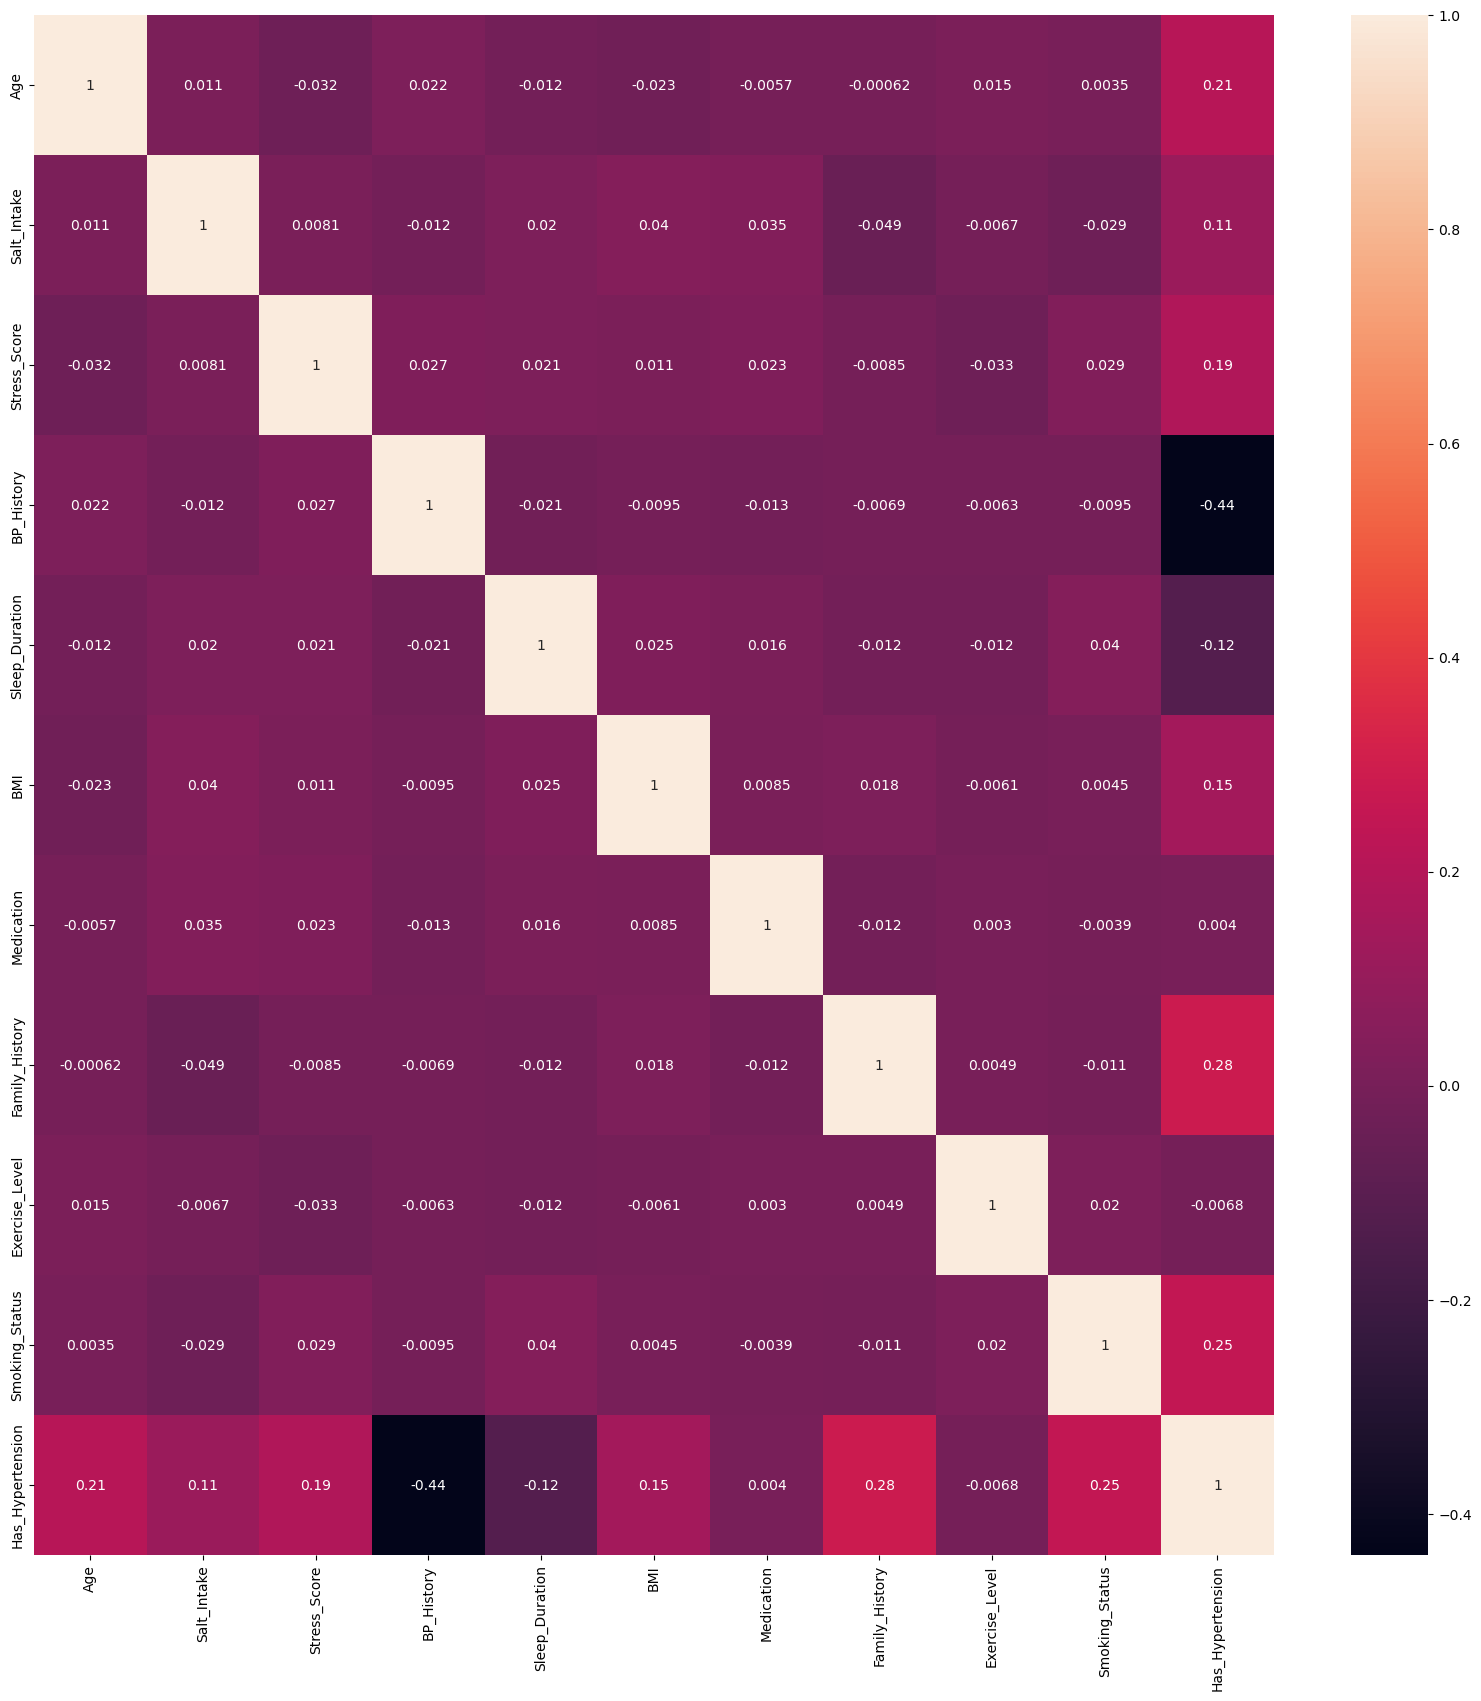

In [ ]:
plt.figure(figsize= (20,20))
corr_matrix = heart_data_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot = True)

## Relevant Features Selection

In [ ]:
target_feature = 'Has_Hypertension'
relevant_features = corr_matrix[target_feature][((corr_matrix[target_feature] >= 0.1) & (corr_matrix[target_feature] < 1)) | ((corr_matrix[target_feature] <= -0.1) & (corr_matrix[target_feature]>-1))].index.tolist()
relevant_features

['Age',
 'Salt_Intake',
 'Stress_Score',
 'BP_History',
 'Sleep_Duration',
 'BMI',
 'Family_History',
 'Smoking_Status']

# Feature Engineering

## Data Preprocessing

In [ ]:
y = heart_data_df.iloc[:, -1].values
X = heart_data_df[relevant_features]


## Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=randstate)

In [ ]:
X_train

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Smoking_Status
1379,43,10.1,6,0,5.7,29.7,1,1
1733,53,7.7,5,2,4.6,14.8,0,0
480,30,6.9,5,1,2.5,28.1,1,0
1885,51,6.7,10,1,9.0,29.8,0,1
22,32,11.1,0,0,4.6,25.2,1,0
...,...,...,...,...,...,...,...,...
1283,28,8.7,3,2,7.1,23.4,1,0
1056,52,7.5,2,0,7.0,26.7,1,0
1302,44,11.6,9,1,7.1,27.0,0,0
1541,18,6.8,10,1,6.0,23.8,1,0


In [ ]:
X_test

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Smoking_Status
943,25,9.0,8,0,8.1,31.2,0,1
697,50,9.7,8,1,6.9,23.8,0,1
129,79,7.9,9,1,4.7,23.0,1,0
181,50,7.0,6,1,7.8,23.2,0,0
1025,68,10.0,1,1,5.6,28.6,0,1
...,...,...,...,...,...,...,...,...
1274,67,6.9,6,0,8.8,25.9,0,0
265,42,9.5,4,1,9.1,29.6,1,0
1674,66,6.2,9,2,6.6,25.9,1,1
721,43,7.9,8,1,5.7,27.4,0,1


In [ ]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,

# Modelling

## Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=maxiter, class_weight=classweight)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
print("Akurasi Logistic Regression :", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

Akurasi Logistic Regression : 0.7959697732997482
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       191
           1       0.82      0.77      0.80       206

    accuracy                           0.80       397
   macro avg       0.80      0.80      0.80       397
weighted avg       0.80      0.80      0.80       397



## Hyper Parameter Tuning

In [ ]:
# Pipeline: scaling + logistic regression (karena logistic regression sensitif terhadap skala fitur)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=maxiter))  # liblinear cocok untuk dataset kecil/imbalance
])

# Parameter grid
param_grid = {
    'logreg__penalty': ['l1', 'l2'],             # Jenis regularisasi
    'logreg__C': [0.01, 0.1, 1, 10, 100],        # Regularisasi: makin kecil = makin kuat regularisasinya
    'logreg__class_weight': [None, classweight]   # Untuk data imbalance
}

# GridSearchCV
lr_grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',     # digunakan agar model fokus pada deteksi Fraud (positif minoritas), karena data tidak seimbang
    cv=5,
    n_jobs=-1,
    verbose=1
)

lr_grid_search.fit(X_train, y_train)
print("\nLogistic Regression")
print("Best Parameters :", lr_grid_search.best_params_)
print("Best Score :", lr_grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Logistic Regression
Best Parameters : {'logreg__C': 0.01, 'logreg__class_weight': None, 'logreg__penalty': 'l2'}
Best Score : 0.839966006675394


## Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=nestimator, class_weight=classweight, random_state=randstate)

#latih Model
rf_model.fit(X_train, y_train)

# Evaluasi tetap dilakukan di test set asli (X_test, y_test)
rf_y_pred = rf_model.predict(X_test)
print("Random Forest :", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Random Forest : 0.9571788413098237
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       191
           1       0.96      0.96      0.96       206

    accuracy                           0.96       397
   macro avg       0.96      0.96      0.96       397
weighted avg       0.96      0.96      0.96       397



## Model Comparison


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       191
           1       0.82      0.77      0.80       206

    accuracy                           0.80       397
   macro avg       0.80      0.80      0.80       397
weighted avg       0.80      0.80      0.80       397

ROC AUC : 0.8742438875616327

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       191
           1       0.96      0.96      0.96       206

    accuracy                           0.96       397
   macro avg       0.96      0.96      0.96       397
weighted avg       0.96      0.96      0.96       397

ROC AUC: 0.9948533523102729


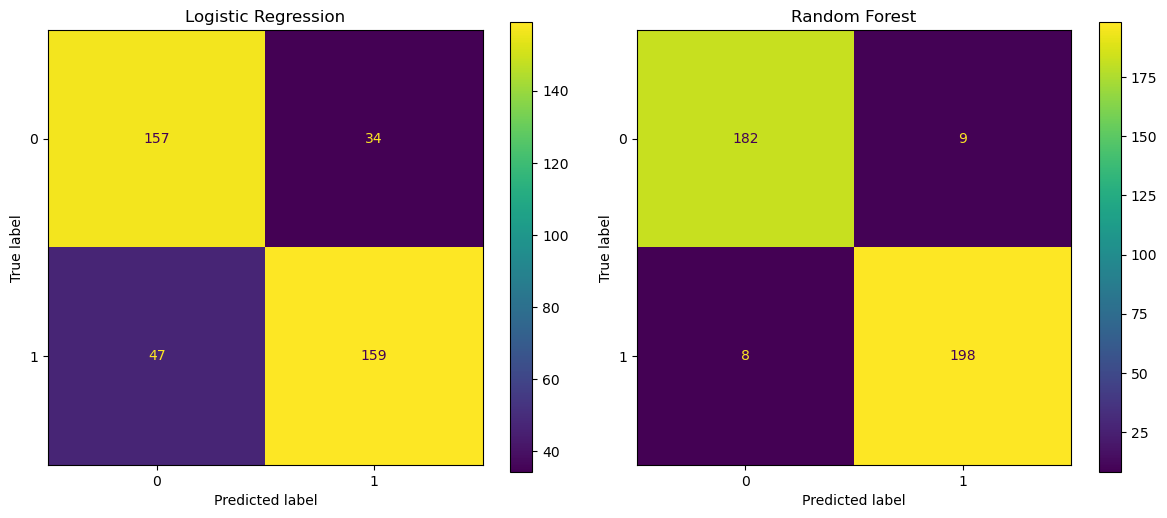

In [ ]:
lr_y_proba = lr_model.predict_proba(X_test)[:, 1]
rf_y_proba = rf_model.predict_proba(X_test)[:, 1]

# ========================================================================

print("=== Logistic Regression ===")
print(classification_report(y_test, lr_y_pred))
print("ROC AUC :", roc_auc_score(y_test, lr_y_proba))

print("\n=== Random Forest ===")
print(classification_report(y_test, rf_y_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_y_proba))

# ==== Confusion Matrix ====

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred, ax=ax[0])
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, ax=ax[1])
ax[1].set_title("Random Forest")
plt.tight_layout()
plt.show()